#Exam data science for marketing

Baptiste Guillemin PGE4

##I.

In [69]:
import pandas as pd
import numpy as np

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Churn_Modelling.csv')

# Print the first 5 lines of the dataframe
print(df.head())

# Convert the dataframe to a numpy array
np_array = df.to_numpy()

   CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0    15634602          619       1   42       2       0.00              1   
1    15647311          608       1   41       1   83807.86              1   
2    15619304          502       1   42       8  159660.80              3   
3    15701354          699       1   39       1       0.00              2   
4    15737888          850       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


##II.

In [54]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Churn_Modelling.csv')

# Print the list of columns in the dataframe
print(df.columns)

# Check for missing values in each column
print(df.isnull().sum())

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
CustomerId         0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [55]:
# Get the unique count of each variable
for col in df.columns:
    unique_count = len(df[col].unique())
    print("The unique count of {} is: {}".format(col, unique_count))

The unique count of CustomerId is: 10000
The unique count of CreditScore is: 460
The unique count of Gender is: 2
The unique count of Age is: 70
The unique count of Tenure is: 11
The unique count of Balance is: 6382
The unique count of NumOfProducts is: 4
The unique count of HasCrCard is: 2
The unique count of IsActiveMember is: 2
The unique count of EstimatedSalary is: 9999
The unique count of Exited is: 2


##III.

In [56]:
import matplotlib.pyplot as plt

# Get the size (shape) of the dataframe
size = df.shape
print("The size of the dataframe is:", size)

# Create a variable Y containing the 10th column of the file
Y = df.iloc[:, 10]

The size of the dataframe is: (10000, 11)


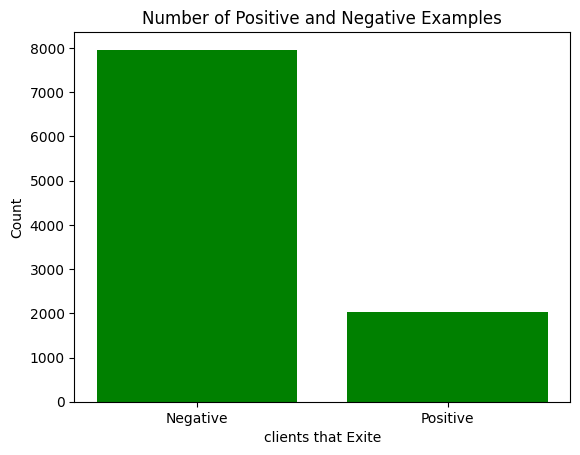

In [57]:
# Count the number of positive and negative examples in Y
positive_count = sum(Y == 1)
negative_count = sum(Y == 0)

# Plot the counts as a bar chart
plt.bar([0, 1], [negative_count, positive_count], color='green')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('clients that Exite')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Examples')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Display the size of the training and testing sets
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

Size of X_train: (7500, 10)
Size of X_test: (2500, 10)


##IV.

#Decision tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Create a Decision Tree Classifier object with entropy as the separation criterion
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred = dt_classifier.predict(X_test)

# Compute the accuracy, recall, precision, and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Print the accuracy, recall, precision, and confusion matrix
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7968
Recall: 0.5
Precision: 0.5118110236220472
Confusion Matrix:
[[1732  248]
 [ 260  260]]


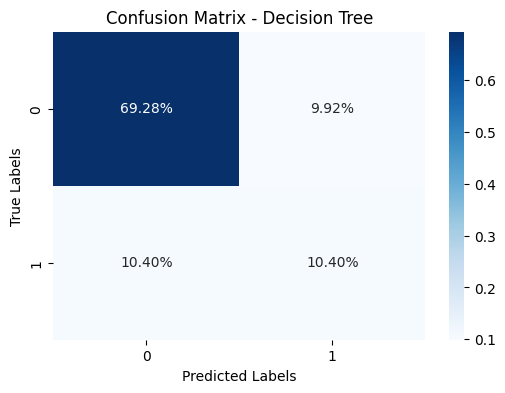

True Negatives: 69.28%
False Positives: 9.92%
False Negatives: 10.40%
True Positives: 10.40%




In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as percentages
total = confusion_mat.sum()
confusion_mat_percent = confusion_mat / total

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_percent, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Print false positive, true positive, false negative and true negative
tn, fp, fn, tp = confusion_mat.ravel()
print('True Negatives:', "{:.2%}".format(tn/total))
print('False Positives:', "{:.2%}".format(fp/total))
print('False Negatives:', "{:.2%}".format(fn/total))
print('True Positives:', "{:.2%}".format(tp/total))
print('\n')

#Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create a Random Forest Classifier object with 100 estimators
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred = rf_classifier.predict(X_test)

# Compute the accuracy, recall, precision, and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Print the accuracy, recall, precision, and confusion matrix
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8512
Recall: 0.425
Precision: 0.7517006802721088
Confusion Matrix:
[[1907   73]
 [ 299  221]]


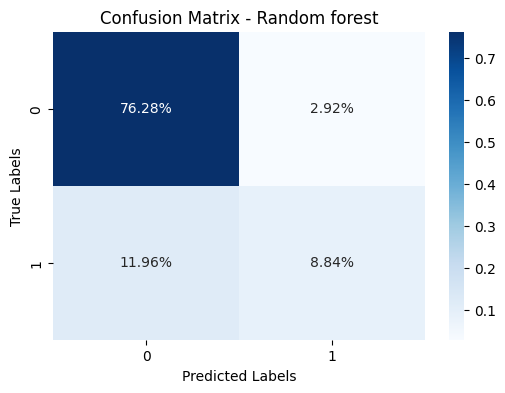

True Negatives: 76.28%
False Positives: 2.92%
False Negatives: 11.96%
True Positives: 8.84%




In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as percentages
total = confusion_mat.sum()
confusion_mat_percent = confusion_mat / total

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_percent, annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random forest')
plt.show()

# Print false positive, true positive, false negative and true negative
tn, fp, fn, tp = confusion_mat.ravel()
print('True Negatives:', "{:.2%}".format(tn/total))
print('False Positives:', "{:.2%}".format(fp/total))
print('False Negatives:', "{:.2%}".format(fn/total))
print('True Positives:', "{:.2%}".format(tp/total))
print('\n')

#MLP classifier

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix


# Create an MLP Classifier object with a hidden layer size of (20, 10)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 10), alpha=0.001, max_iter=200)

# Fit the classifier on the training data
mlp_classifier.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred = mlp_classifier.predict(X_test)

# Compute the accuracy, recall, precision, and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Print the accuracy, recall, precision, and confusion matrix
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.792
Recall: 0.0
Precision: 0.0
Confusion Matrix:
[[1980    0]
 [ 520    0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Split the dataset into training, testing, and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=1)

# Create an MLP Classifier object with hidden layer sizes (20, 10), alpha=0.001, and max_iter=200
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 10), alpha=0.001, max_iter=200, random_state=0)

# Fit the classifier on the training data
mlp_classifier.fit(X_train, Y_train)

# Predict the labels of the validation data
Y_val_pred = mlp_classifier.predict(X_val)

# Predict the labels of the test data
Y_pred = mlp_classifier.predict(X_test)

# Compute the accuracy, recall, precision, and confusion matrix for validation data
accuracy_val = accuracy_score(Y_val, Y_val_pred)
recall_val = recall_score(Y_val, Y_val_pred)
precision_val = precision_score(Y_val, Y_val_pred)
confusion_mat_val = confusion_matrix(Y_val, Y_val_pred)

# Compute the accuracy, recall, precision, and confusion matrix for test data
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Print the accuracy, recall, precision, and confusion matrix for validation data
print("Validation Set - Accuracy:", accuracy_val)
print("Validation Set - Recall:", recall_val)
print("Validation Set - Precision:", precision_val)
print("Validation Set - Confusion Matrix:")
print(confusion_mat_val)
print('\n')

# Print the accuracy, recall, precision, and confusion matrix for test data
print("Test Set - Accuracy:", accuracy)
print("Test Set - Recall:", recall)
print("Test Set - Precision:", precision)
print("Test Set - Confusion Matrix:")
print(confusion_mat)


Validation Set - Accuracy: 0.7873333333333333
Validation Set - Recall: 0.0
Validation Set - Precision: 0.0
Validation Set - Confusion Matrix:
[[1181    0]
 [ 319    0]]


Test Set - Accuracy: 0.7946666666666666
Test Set - Recall: 0.0
Test Set - Precision: 0.0
Test Set - Confusion Matrix:
[[1192    0]
 [ 308    0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


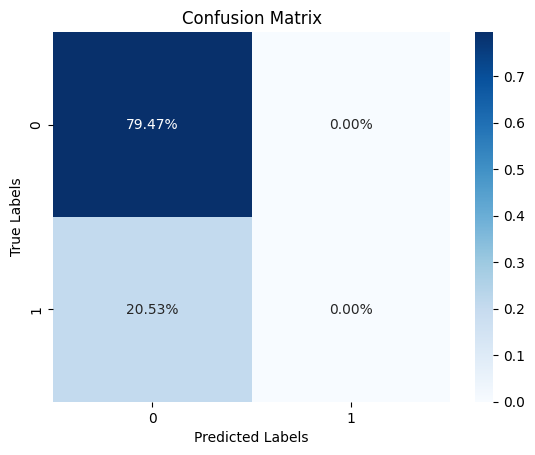

True Negatives: 79.47%
False Positives: 0.00%
False Negatives: 20.53%
True Positives: 0.00%




In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print false positive, true positive, false negative and true negative
tn, fp, fn, tp = confusion_mat.ravel()
print('True Negatives:', "{:.2%}".format(tn/total))
print('False Positives:', "{:.2%}".format(fp/total))
print('False Negatives:', "{:.2%}".format(fn/total))
print('True Positives:', "{:.2%}".format(tp/total))
print('\n')

There is no false positive nor true positive becauyse for neural network, the split should be divided in 3 set, validation, test and train. Indeed, NN train on train set and test set. Then we compute the metrics with validation test to test our prediction when the model is trained. 

Random forest and decision tree are regular machine learning model not NN. Thus, 2 split train and test are enough

###V. 

1. Increasing the training set will not improove accuracy on new data. Maybe it will increase train accuracy but the model will overfit.

2. In philosophy of science, an AI is an induction. It is way to explain reality from particular example get from it a general knowledge, a sort of rule. In your case a function that compute prediction.

Induction is by definition very limited, an AI is learning almost by heart the data, it is really good at this but when the model is expose to new data it failed to predict well. This is overfitting. Every AI tend to overfit if the data scientist do his job to correct this. 

In mathematics, fitting the curb of the model's function to close to the point of the train data to get 100% on train set. A good generalization tend to be a model that is not try to explain all the label for each point, but generalize better, get lower accuracy on train set but better test set and validation set (new data).

3. The train accuracy is too high and test and validation accuracy is too low.

VI.

1. The best model is random forest classifier with 0,85%. It could be improove by balancing the dataset between client that churn annd client that stay. Indeed, there is big difference between false negative and false positive is important, it predict better when client won't quite. Which make sense considering the unbalanced dataset in that direction (more information about clients staying than leaving).

Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the proportion of actual positive cases (clients who exit from their subscription) that are correctly identified by the model as positive. In other words, it is the percentage of clients who actually left and were correctly identified as leaving by the model.

Precision is the ratio of true positives to the sum of true positives and false positives. It measures the proportion of predicted positive cases that are actually positive. In other words, it is the percentage of clients predicted to leave who actually left.

In this context, high recall means that the model is correctly identifying a high proportion of the clients who will actually leave their subscription. High precision means that when the model predicts a client will leave their subscription, it is correct most of the time. A good model should have both high recall and high precision.

2. 

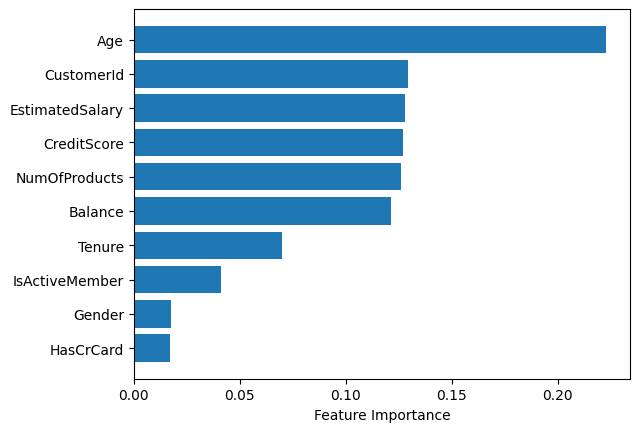

In [65]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# assuming X_train and y_train are the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)

# get feature importances and their names
importances = rfc.feature_importances_
feature_names = df.columns[:-1]

# sort features by importance
sorted_idx = importances.argsort()

# plot feature importances
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()